In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.grid_search import GridSearchCV
#from sklearn.grid_search import RandomizedSearchCV
#from sklearn.cross_validation import  cross_val_score
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

In [2]:
def load_data(File):
    return pd.read_csv(File,header=None,sep = ',',index_col=False)

# Import The Data
original_data= load_data("E:/GENG5511 research/research/dataset/F_data.csv")
# Take a Quick Look at the Data Structure
original_data.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,11,4898,2.397895,8.496582,1.290442,0.448755,0.142857,0.001021,0.161109,...,0.873566,0.405138,0,0,445.272727,0.002246,193.031058,516.667634,0.818182,4
1,0,8,4177,2.197225,8.337349,2.496721,0.164951,0.035714,0.000239,0.049575,...,2.252626,1.084729,0,0,464.111111,0.002155,1.268723,3.233381,0.777778,3
2,0,7,337,1.945910,5.820083,1.532854,0.424332,0.111111,0.002967,0.133154,...,224.759840,13.685398,0,0,48.142857,0.020772,0.072978,0.053259,0.142857,2
3,0,23,195,3.135494,5.273000,0.558070,0.753846,0.500000,0.246154,0.253846,...,5.210239,2.057351,0,0,8.478261,0.117949,521.701463,1748.683961,0.304348,5
4,0,27,325,3.295837,5.783825,1.257263,0.418462,0.250000,0.116923,0.125691,...,1.072403,1.161221,0,0,12.037037,0.083077,101.594273,92.012978,0.407407,3


In [3]:
#original_data.info()

In [4]:
# To store purely features data from dataset
X= original_data.iloc[:, :36].values

# To store purely label from dataset
y= original_data.iloc[:,-1]

In [5]:
# Split the data first Without feature scaling
print("Training_size: {}; Test_size: {}" .format(len(X),len(y)))

Training_size: 21; Test_size: 21


In [6]:
def plot_confusion_matrix(cm, number_of_instances, title=None, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=number_of_instances, yticklabels=number_of_instances, title=title,
               ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], "d"),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [7]:
# compute different scores for performance measurements
def evaluation(groundtruth, prediction):
    AccuracyScore=accuracy_score(groundtruth, prediction)
    #'weighted' take label imbalance into account.  
    F1Score=f1_score(groundtruth, prediction,average='macro') 
    ConfusionMatrix=confusion_matrix(groundtruth, prediction)
    return AccuracyScore,F1Score,ConfusionMatrix;

In [8]:
from sklearn import datasets
from sklearn.feature_selection import RFE  #RFECV:带交叉验证的递归特征移除
from sklearn.svm import SVC
#start = time.clock()
#dataset = original_data # laod iris dataset
#tree_clf = DecisionTreeClassifier(random_state=42)
model = DecisionTreeClassifier() # build SVC model

rfe = RFE(model,step=1) # limit number of variables to three
rfe = rfe.fit(X,y)
print('对应特征的标记（是否被选中）：')
print(rfe.support_)

#end = time.clock()
#print(end-start)

对应特征的标记（是否被选中）：
[False False False False  True False  True  True  True  True  True  True
 False False False False False False False False  True  True False False
  True  True  True  True  True  True  True  True  True False False False]


In [9]:
import pandas as pd
import numpy as np
#x=[0,2,3,6,7,9,11,12,15,18,22,23,24,25]
N = rfe.support_
N[N==True] = 1
N[N==False] = 0
x=[]
for i in range(0, len(X)):
    if(N[i]==0):
        x.append(i)
#print(x)
df = pd.DataFrame(X)
#print(df)
X_new = df.drop(df.columns[x],axis=1)
X_new.head(5)

,4,6,7,8,9,10,11,20,21,22,...,26,27,28,29,30,31,32,33,34,35
0,8.496582,0.448755,0.142857,0.001021,0.161109,0.814074,1.228389,226.683928,2308.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.400610,0.448759,0.413514,0.521284,0.439526
1,8.337349,0.164951,0.035714,0.000239,0.049575,0.197534,5.062409,799.825506,6077.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.997904,0.316833,0.997910,0.259061,0.998146
2,5.820083,0.424332,0.111111,0.002967,0.133154,0.737113,1.356643,32.449647,370.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.806002,0.630903,0.812157,0.854080,0.745025
3,5.273000,0.753846,0.500000,0.246154,0.253846,3.062500,0.326531,51.012545,3916.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.773977,1.000000,1.000000,0.810906,1.000000
4,5.783825,0.418462,0.250000,0.116923,0.125691,0.719577,1.389706,109.717482,5274.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.809205,0.659514,0.781595,0.854602,0.803179


In [10]:
from sklearn.metrics import accuracy_score, f1_score ,confusion_matrix

In [11]:
from sklearn.model_selection import train_test_split
# splitting the dataset - dataset still contains class label
X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, test_size=0.25, random_state=30)

In [12]:
# use Defualt decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)

# Storing the label from prediction for the whole testing set
dt_pred=tree_clf.predict(X_test)

# some performance measurements
df_Accuracy_score,df_F1_score,df_Confusion_matrix = evaluation(Y_test,dt_pred)
print(" For trainingset in default decision tree classifier: \n" ,"Accuracy score:  ",df_Accuracy_score,"\n","F1 score: ",df_F1_score, "\n","Confusion matrix: \n",df_Confusion_matrix)

 For trainingset in default decision tree classifier: 
 Accuracy score:   0.3333333333333333 
 F1 score:  0.2333333333333333 
 Confusion matrix: 
 [[1 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]]


D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


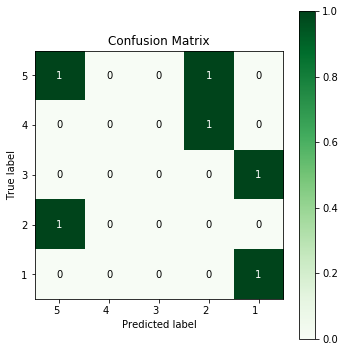

In [13]:
plot_confusion_matrix(df_Confusion_matrix,Y_test,title="Confusion Matrix")
plt.savefig('./11.jpg')

In [14]:
# show discription for cross-validation
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation", scores.std())

In [15]:
dt_old = DecisionTreeClassifier(min_samples_split=10,random_state=2)
dt_old.fit(X, y)
scores = cross_val_score(dt_old, X, y, cv=3)
display_scores(scores)

Scores: [0.375      0.14285714 0.66666667]
Mean: 0.39484126984126977
Standard deviation 0.21430408504439913


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [16]:
# check other score on train..
dt_cs_pred=cross_val_predict(dt_old, X, y, cv=3)
# some performance measurements
df_Accuracy_score,df_F1_score,df_Confusion_matrix = evaluation(y,dt_cs_pred)
print(" For training set with default decision tree classifier: \n Show cross validation prediction score: \n" ,"Accuracy score:  ",df_Accuracy_score,"\n","F1 score: ",df_F1_score, "\n","Confusion matrix: \n",df_Confusion_matrix ,"\n")

 For training set with default decision tree classifier: 
 Show cross validation prediction score: 
 Accuracy score:   0.38095238095238093 
 F1 score:  0.2546031746031746 
 Confusion matrix: 
 [[3 0 4 0 0]
 [1 0 1 0 0]
 [1 0 4 1 0]
 [1 0 1 1 0]
 [1 0 2 0 0]] 



D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


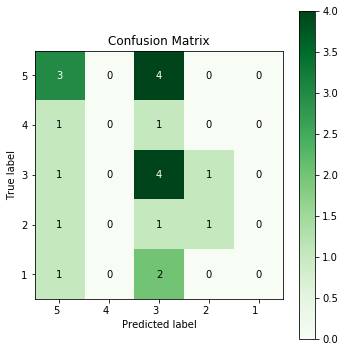

In [17]:
plot_confusion_matrix(df_Confusion_matrix,Y_test,title="Confusion Matrix")
plt.savefig('./12.jpg')